In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
path_data = "../assets/"

## 新建flower表格

In [3]:
flower = Table().with_columns("Nuber of petals", make_array(8, 34, 5),
                    "petals", make_array("lotus", "sunflower", "rose"),
                    "Color", make_array("pink", "yellow", "red"))
flower

Nuber of petals,petals,Color
8,lotus,pink
34,sunflower,yellow
5,rose,red


## 从assets文件夹中读取.csv文件

In [4]:
minard = Table.read_table(path_data + "nba_salaries.csv")
# there is little mistake in the name and the relation of the .csv files, will be modified latter
minard

Longitude,Latitude,City,Direction,Survivors
32,54.8,Smolensk,Advance,145000
33.2,54.9,Dorogobouge,Advance,140000
34.4,55.5,Chjat,Advance,127100
37.6,55.8,Moscou,Advance,100000
34.3,55.2,Wixma,Retreat,55000
32,54.6,Smolensk,Retreat,24000
30.4,54.4,Orscha,Retreat,20000
26.8,54.3,Moiodexno,Retreat,12000


## 显示表格的总体信息

In [5]:
print(str(minard.num_columns) + " columns" + " * " + str(minard.num_rows) + " rows")

5 columns * 8 rows


In [6]:
minard.relabel("City", "City name")

Longitude,Latitude,City name,Direction,Survivors
32,54.8,Smolensk,Advance,145000
33.2,54.9,Dorogobouge,Advance,140000
34.4,55.5,Chjat,Advance,127100
37.6,55.8,Moscou,Advance,100000
34.3,55.2,Wixma,Retreat,55000
32,54.6,Smolensk,Retreat,24000
30.4,54.4,Orscha,Retreat,20000
26.8,54.3,Moiodexno,Retreat,12000


In [7]:
minard.column("City name").item(3)

'Moscou'

In [8]:
minard.select("Longitude", "Latitude", "City name")

Longitude,Latitude,City name
32,54.8,Smolensk
33.2,54.9,Dorogobouge
34.4,55.5,Chjat
37.6,55.8,Moscou
34.3,55.2,Wixma
32,54.6,Smolensk
30.4,54.4,Orscha
26.8,54.3,Moiodexno


In [9]:
minard.select(0, 1, 2)

Longitude,Latitude,City name
32,54.8,Smolensk
33.2,54.9,Dorogobouge
34.4,55.5,Chjat
37.6,55.8,Moscou
34.3,55.2,Wixma
32,54.6,Smolensk
30.4,54.4,Orscha
26.8,54.3,Moiodexno


## 新增一列进行计算

In [10]:
minard.with_column("Percentage Surviving", minard.column("Survivors")/minard.column("Survivors").item(0), PercentFormatter)

Longitude,Latitude,City name,Direction,Survivors,Percentage Surviving
32,54.8,Smolensk,Advance,145000,100.00%
33.2,54.9,Dorogobouge,Advance,140000,96.55%
34.4,55.5,Chjat,Advance,127100,87.66%
37.6,55.8,Moscou,Advance,100000,68.97%
34.3,55.2,Wixma,Retreat,55000,37.93%
32,54.6,Smolensk,Retreat,24000,16.55%
30.4,54.4,Orscha,Retreat,20000,13.79%
26.8,54.3,Moiodexno,Retreat,12000,8.28%


In [11]:
minard.drop(0, 1, 3)

City name,Survivors
Smolensk,145000
Dorogobouge,140000
Chjat,127100
Moscou,100000
Wixma,55000
Smolensk,24000
Orscha,20000
Moiodexno,12000


## 分析nba球星和薪资

In [12]:
nba_info = Table.read_table("../assets/cones.csv")
nba_info

RANK,PLAYER,POSITION,TEAM,SALARY($M)
1,Kobe Bryant,SF,Los Angeles Lakers,25
2,Joe Johnson,SF,Brooklyn Nets,24.8949
3,LeBron James,SF,Cleveland Cavaliers,22.9705
4,Carmelo Anthony,SF,New York Knicks,22.875
5,Dwight Howard,C,Houston Rockets,22.3594
6,Chris Bosh,PF,Miami Heat,22.1927
7,Chris Paul,PG,Los Angeles Clippers,21.4687
8,Kevin Durant,SF,Oklahoma City Thunder,20.1586
9,Derrick Rose,PG,Chicago Bulls,20.0931
10,Dwyane Wade,SG,Miami Heat,20


In [13]:
nba_info.sort("SALARY($M)", descending=True)

RANK,PLAYER,POSITION,TEAM,SALARY($M)
1,Kobe Bryant,SF,Los Angeles Lakers,25
2,Joe Johnson,SF,Brooklyn Nets,24.8949
3,LeBron James,SF,Cleveland Cavaliers,22.9705
4,Carmelo Anthony,SF,New York Knicks,22.875
5,Dwight Howard,C,Houston Rockets,22.3594
6,Chris Bosh,PF,Miami Heat,22.1927
7,Chris Paul,PG,Los Angeles Clippers,21.4687
8,Kevin Durant,SF,Oklahoma City Thunder,20.1586
9,Derrick Rose,PG,Chicago Bulls,20.0931
10,Dwyane Wade,SG,Miami Heat,20


In [14]:
nba_info.where("SALARY($M)", are.above(15))

RANK,PLAYER,POSITION,TEAM,SALARY($M)
1,Kobe Bryant,SF,Los Angeles Lakers,25
2,Joe Johnson,SF,Brooklyn Nets,24.8949
3,LeBron James,SF,Cleveland Cavaliers,22.9705
4,Carmelo Anthony,SF,New York Knicks,22.875
5,Dwight Howard,C,Houston Rockets,22.3594
6,Chris Bosh,PF,Miami Heat,22.1927
7,Chris Paul,PG,Los Angeles Clippers,21.4687
8,Kevin Durant,SF,Oklahoma City Thunder,20.1586
9,Derrick Rose,PG,Chicago Bulls,20.0931
10,Dwyane Wade,SG,Miami Heat,20


In [15]:
nba_info.where("POSITION", "PG").where('SALARY($M)', are.above(15))

RANK,PLAYER,POSITION,TEAM,SALARY($M)
7,Chris Paul,PG,Los Angeles Clippers,21.4687
9,Derrick Rose,PG,Chicago Bulls,20.0931
17,Russell Westbrook,PG,Oklahoma City Thunder,16.7442
18,Kyrie Irving,PG,Cleveland Cavaliers,16.4075
23,John Wall,PG,Washington Wizards,15.852


In [16]:
nba_info.where("TEAM", are.containing("Golden")).show(15)

RANK,PLAYER,POSITION,TEAM,SALARY($M)
28,Klay Thompson,SG,Golden State Warriors,15.501
34,Draymond Green,PF,Golden State Warriors,14.2609
38,Andrew Bogut,C,Golden State Warriors,13.8
56,Andre Iguodala,SF,Golden State Warriors,11.7105
57,Stephen Curry,PG,Golden State Warriors,11.3708
101,Jason Thompson,PF,Golden State Warriors,7.00847
128,Shaun Livingston,PG,Golden State Warriors,5.54373
178,Harrison Barnes,SF,Golden State Warriors,3.8734
179,Marreese Speights,C,Golden State Warriors,3.815
237,Leandro Barbosa,SG,Golden State Warriors,2.5


## 实际案例分析

In [17]:
# As of August 2021, this census file is online here: 
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'

# A local copy can be accessed here in case census.gov moves the file:
# data = path_data + 'nc-est2019-agesex-res.csv'

full_census_table = Table.read_table(data)
full_census_table.show()

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


In [18]:
# get the total's data
total = full_census_table.where("AGE", are.equal_to(999))
total

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,999,308745538,308758105,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
1,999,151781326,151788777,152074758,153200058,154374397,155481926,156654424,157856394,159021785,160045920,160885734,161657324
2,999,156964212,156969328,157246908,158356816,159456593,160511789,161646584,162778769,163919526,164939619,165801767,166582199


In [19]:
total_male = total.take(1) # male's total data info,
total_female = total.take(2) # female's total data info

In [20]:
pop_male_per_year = total_male.drop(0, 1).take(0)
pop_male_per_year

CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
151781326,151788777,152074758,153200058,154374397,155481926,156654424,157856394,159021785,160045920,160885734,161657324


### 分析2014和2019之间各年龄段总人口的变化

In [21]:
partial_census_table = full_census_table.select(0, 1, "POPESTIMATE2014", "POPESTIMATE2019").where("SEX", are.equal_to(0)).drop(0)
partial_census_table

AGE,POPESTIMATE2014,POPESTIMATE2019
0,3954787,3783052
1,3948891,3829599
2,3958711,3922044
3,4005928,3998665
4,4004032,4043323
5,4004576,4028281
6,4133372,4017227
7,4152666,4022319
8,4118349,4066194
9,4106068,4061874


In [22]:
partial_census_table.labels

('AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')

In [23]:
partial_census_table

AGE,POPESTIMATE2014,POPESTIMATE2019
0,3954787,3783052
1,3948891,3829599
2,3958711,3922044
3,4005928,3998665
4,4004032,4043323
5,4004576,4028281
6,4133372,4017227
7,4152666,4022319
8,4118349,4066194
9,4106068,4061874


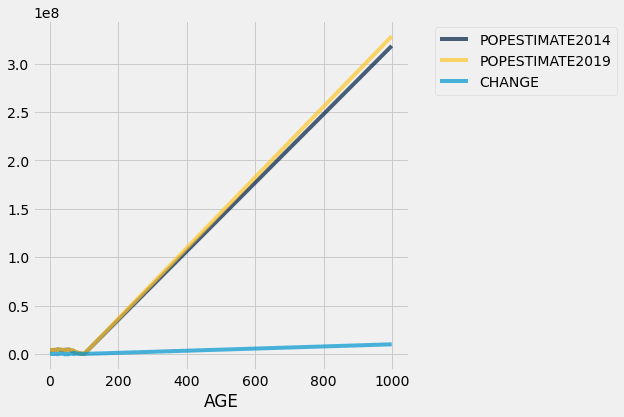

In [35]:
partial_census_table.plot("AGE")

In [24]:
change = partial_census_table.column(2) - partial_census_table.column(1)
change

array([-171735, -119292,  -36667,   -7263,   39291,   23705, -116145,
       -130347,  -52155,  -44194,  -53618,  104804,  141200,    7126,
        -66894,   12631,  -15505,  -39515,   34483,    9650, -141227,
       -201943, -305343, -350651, -241835,   37812,  214055,  409073,
        473478,  423954,  367437,  187860,  107298,  164752,  106148,
        231701,  368026,  396847,  456720,  413012,  259488,  114457,
       -109083, -465225, -408175, -309623, -172883,  -10547,  136860,
        -67294, -382619, -471938, -465942, -454394, -257650,  -35878,
        -23436,    6477,  204719,  267974,  276258,  389471,  479237,
        431491,  468789,  397927,  277420,  -15667,  777964,  721963,
        675278,  566691,  999406,  334331,  395023,  425854,  529432,
        355290,  240082,  185899,  211738,  166007,   88415,   62136,
         33339,      69,    3971,   11314,   30645,   39031,   26166,
         42338,   41539,   36143,   47264,   51094,   37036,   34021,
         26604,   15

In [25]:
initial = partial_census_table.column(1)
initial

array([  3954787,   3948891,   3958711,   4005928,   4004032,   4004576,
         4133372,   4152666,   4118349,   4106068,   4114558,   4084457,
         4067187,   4168095,   4231353,   4162828,   4165925,   4181940,
         4221344,   4320789,   4410910,   4480266,   4604115,   4692295,
         4686353,   4501246,   4397165,   4324796,   4345247,   4382190,
         4246947,   4314451,   4314207,   4268221,   4353984,   4084165,
         4004418,   3964439,   3848856,   3969337,   3845825,   3905797,
         4083824,   4319265,   4375450,   4147532,   4062255,   4068585,
         4145797,   4397069,   4479191,   4476281,   4467724,   4523245,
         4563253,   4410443,   4384452,   4335908,   4180851,   4145881,
         3976405,   3825701,   3677408,   3564597,   3481789,   3376670,
         3340649,   3480104,   2567511,   2530460,   2461426,   2516392,
         2191642,   2000102,   1888141,   1772432,   1692960,   1555971,
         1480735,   1414010,   1263540,   1215634, 

In [26]:
partial_census_table.with_columns("CHANGE", change).show()

AGE,POPESTIMATE2014,POPESTIMATE2019,CHANGE
0,3954787,3783052,-171735
1,3948891,3829599,-119292
2,3958711,3922044,-36667
3,4005928,3998665,-7263
4,4004032,4043323,39291
5,4004576,4028281,23705
6,4133372,4017227,-116145
7,4152666,4022319,-130347
8,4118349,4066194,-52155
9,4106068,4061874,-44194


In [28]:
partial_census_table = partial_census_table.with_columns("CHANGE", change)

In [33]:
rate = partial_census_table.column(3) - partial_census_table.column(1)

In [1]:
partial_census_table.with_columns("Percentage Rate", rate, PercentFormatter)

NameError: name 'partial_census_table' is not defined